# Detección de Anomalías
Como lo el nombre lo indica, deteccion de anolias es un metodo para detectar casos atipicos (outliers) en ingles tenemos "anomaly detection", o outlier detection.


## Aplicaciones:

* Fradude bancario, de seguros , o de tarjeta de credito.
No solo a nivel bancario sino comercial.
* Defectors de fabrica. Danhos estructurales en piezas, fallas en sistemas industriales.
* Monitoreo de salud. En diagnosticos medicos, deteccion de tumores, mamomagramas, etc.  Brotes de enfermedades.
* Prevencion de crimen. Camaras de vigilancia.
* Deteccion de intrusos.  Entre otras.


## Metodos de deteccion de anomalias
* Estadisticos
* basados en proximidad
* basados en densidad
* basados en agrupmiento (clustering)


El unico metodo estudiado aca es el estadistico.

### Metodo estadistico.


#### Distribucion normal.
Comenzamos con  la distribucion normal univariada (en los reales).
Asumimos $x \in \mathbb{R}$.


$$ p(x; \mu, \sigma^2) = \mathcal{N}(\mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} \mathrm{e}^{-\frac{(x - \mu)^2}{2 \sigma^2}}.$$
donde $\mu \in \mathbb{R}$, $\sigma \in \mathbb{R}$.  El valor $p(x; \mu , \sigma^2)$ corresponde a la **probabilidad** puntual de $x$. Realmente
la probabilidad en estos estos casos se caulcula como

$$ P(a \le x \le b ) = \int_a^b p(x; \mu, \sigma^2) dx.$$

Aca la media $\mu$ y varianza $\sigma^2$ estan determinadas por


\begin{eqnarray}
\mu &=& \frac{1}{m} \sum_{i=1}^m x^{(i)} \\
\sigma^2 = \frac1m \sum_{i=1}^m (x^{(i)} - \mu)^2
\end{eqnarray}
A veces se usa $\frac{1}{m-1}$ en vez de $\frac{1}{m}$ cuando se requiere que no se un
[estimador sesgado](https://en.wikipedia.org/wiki/Bias_of_an_estimator).





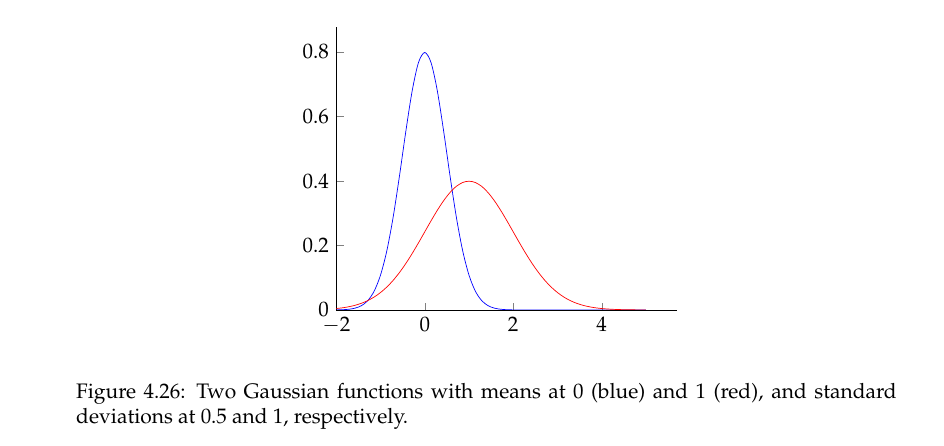

Que pasa si $x \in \mathbb{R}^n$. No pasa mucho vamos a ver la generalizacion de lo anterior a $\mathbb{R}^n$.

La media y la varianza se calculan con formulas parecidas.

$$ \mu = \frac1m \sum_{i=1}^m x^{(i)} .$$
La formula se conserva pero con $x^{(i)} \in \mathbb{R}^n$.

En cuanto a la varianza


$$\sigma^2 = \frac1m \sum_{i=1}^m \| x^{(i)} - \mu \|^2  .$$

La funcion de densidad multivariada, asumiendo que las componentes de $x^{(i)}$ son **estadisticamente independientes** (es decir que la probabilidad de la interseccion es el producto de las probabilidades) tenemos


$$p(x^{(i)}, \mu, \sigma^2) = \prod_{j=1}^n p(x_j^{(i)}; \mu_j, \sigma_j^2) = \frac{1}{\sqrt{ (2 \pi)^n \prod_{j=1}^n \sigma_j^2}} \exp (\left ( - \sum_{j=1}^n \frac{(x_j^{(i)} - \mu_j)^2}{2 \sigma_j^2}  \right ) \quad , i=1,2, \cdots, m . \tag{1}$$

La pregunta que hacemos en cualquier caso (unidimensional o multidimensional) es si una muestra $x^{(i)}$ es anomala o no. Para esto debemos fijar un umbral
$\epsilon$ y pensar que si la probabilidad esta debajo de ese umbral la muestra es anomala. Es decir, que $x^{(i)}$ es una muestra anomala si

$$p(x^{(i)}, \mu, \sigma^2) < \epsilon .$$


### Funcion normal en $\mathbb{R}^n$ en general. La ecuacion (1) es una caso particular cuando las componentes del vector $x^{(i)}$ son estadisticamente independientes. Que pasa si no lo son?

En general la distribucion normal multivariada esta dada por


$$ p(x, \mu, \Sigma) = \frac{1}{\sqrt{(2 \pi)^n | \det(\Sigma) |}}
\exp \left ( -\frac12 (x - \mu)^T \Sigma^{-1} (x - \mu) ) \right ) . \tag{2} $$

Habemos de los parametros de esta funcion.

La media

$$ \mu_i = \frac1m \sum_{j=1}^m x_i^{(j)} .$$

En cuando a la matriz de covarianza, esta definida por. Dado que tenemos la matriz de datos $X$ (cada fila de esta matriz es un muestra $x^{(i)} \in \mathbb{R}^n$,

$$\Sigma = \frac1m ( X - \mu)^T ( X - \mu)  .$$
A la matriz $\Sigma^{-1}$ se le llama matriz de concentracion.

Incluimos la siguiente grafica para inutir el significado de esta distribucion normal multivariada.

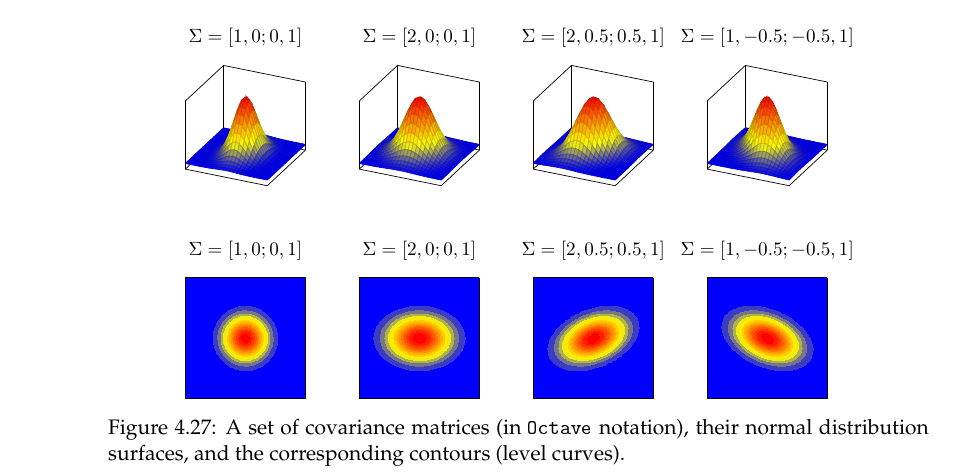

La notacion en las matrices es la de Matlab. Es decir

\begin{eqnarray}
\Sigma = [2, 0.5; 0.5, 1 ] =
\begin{pmatrix}
2 & 0.5 \\
0.5 & 1
\end{pmatrix}
\end{eqnarray}

La matriz $\Sigma$ es positiva definida.
Los contornos que se muestran en la Figura 4.27 son elipses de la forma


$$-\frac12 (x - \mu)^T \Sigma^{-1} (x - \mu) = \text{constante} .$$

Pudiera pasar que la matriz de covarianza $\Sigma$ fuera diagonal. Esto significa que no hay tipo de correlacion entre los distintos atributos (features) del vector $x$. La matriz tendria la forma


$$ \Sigma =
\begin{pmatrix}
\sigma_1^2 & 0 & \cdots & \cdots & \cdots & 0 \\
0  & \sigma_2^2 & \ddots & &  & 0 \\
\vdots  &  \ddots  & \sigma_3^2 & \ddots &   & 0 \\
\vdots &  & \ddots & \ddots  &  \ddots & \vdots \\
\vdots &  & & \ddots & \ddots  &  \vdots \\
0 & \cdots & \cdots & \cdots & 0 & \sigma_n^2
\end{pmatrix}
.$$

La matriz inversa $\Sigma^{-1}$ esta dada por
$$ \Sigma^{-1} =
\begin{pmatrix}
\sigma_1^{-2} & 0 & \cdots & \cdots & \cdots & 0 \\
0  & \sigma_2^{-2} & \ddots & &  & 0 \\
\vdots  &  \ddots  & \sigma_3^{-2} & \ddots &   & 0 \\
\vdots &  & \ddots & \ddots  & \ddots & \vdots \\
\vdots &  & & \ddots & \ddots  &  \vdots \\
0 & \cdots & \cdots & \cdots & 0 & \sigma_n^{-2}
\end{pmatrix}
. $$

En este caso especial, la ecuacion (2) se reduce a la ecuacion (1) pues,


$$\det \Sigma = \prod_{j=1}^n \sigma_j^2  .$$



En cuando a la parte exponencial, tenemos


$$\frac12 ( x^{(i)} - \mu)^T \Sigma^{-1} (x^{(i)} - \mu) = -\frac12 \sum_{j=1}^n  \frac{( x_j^{(i)} - \mu_j)^2}{\sigma_j^2}  .$$

En conclusion, la forma mas general de la distribucion normal en $\mathbb{R}^n$ (multivariada) esta dada por la ecuacion (2). Esta se reduce a la ecuacion (1) cuando los atributos son estadisticamente independientes ( la matriz de covarianza es diagonal).

Una vez se selecciona el umbral $\epsilon$ el siguiente algoritmo se puede usar para clasificar las muestras anomalas (atipicas).

El conjunto de los $x^{(i)}$ se debe separar, por lo menos, en dos subconjuntos, una de entrenamiento y otro de prueba. Asumamos, por el momento,
que los atributos son estadisticamente independientes.

1. Seleccione las muestras de entrenamiento (aleatoriamente).
2.  Encuentre las medias y varianzas: $\mu_1, \mu_2, \cdots, \mu_n$ y
$\sigma_1^2, \sigma_2^2, \cdots, \sigma_n^2$.
3. Calcule la probabilidad conjunta (ecuacion (1)).  
4. Separe aqueyos eventos en los cuales $p(x) < \epsilon$. Estas son las muestras anomalas.

Que pasa si los eventos no son estadisticamente independientes? En este
caso toca calcular la matriz de covarianza $\Sigma$ y usar la ecuacion (2) en el paso (3).

### Como sabemos o escojemos el hiperparametro $\epsilon$?

Se separa un conjunto para hacer validacion cruzada (cross-validation).
Este conjunto debe tener **etiquetas** (esto seria un caso **supervisado**).
Las etiquetas son:

1. Si es una anomalias $y=1$.
2. Si no es una anomalias $y=0$.

Se hace un barrido sobre este conjunto y se determina la matriz de confusion. Es decir los TP, TN, FP, FN.  Se puede escoger una medida (precision, exactitud, F1, etc). Normalmente se escoge F1 (que es una combinacion de precision y sensibilidad (recall). Ver clase anterior en evaluacion de clasificacion (la matriz de confusion, etc).  La idea es que usando el F1 score se determine cual es el $\epsilon$ optimo entre un numero discreto (finito) de posibles $\epsilon$.






## Que pasa si la distribucion no es normal?

Es posible que la distribucion (estadistica) de sus datos no se ajuste a una normal sino a otra. Por ejemplo,
[exponencial](https://en.wikipedia.org/wiki/Exponential_distribution),
[log normal distribution](https://en.wikipedia.org/wiki/Log-normal_distribution), o [Poisson](https://en.wikipedia.org/wiki/Poisson_distribution), entre otras.

Se asume que estas son **parametricas** o sea que, como la normal, hay parametros que se pueden calcular como la media y varianza, etc.

Otra cosa que se puede hacer es mover los datos a una distribcion normal mediante un **mapeo**.  Por ejemplo.


* $$ x \mapsto \log (x + c) .$$
* $$ x \mapsto \sqrt{x} .$$
o otros mapeos.

Recuerde que existen otros metodos y que el unico que estudiamos aca es el estadistico.